In [1]:
from project_heart.lv import LV
import numpy as np
import pyvista as pv
pv.set_jupyter_backend("pythreejs")

import os
from pathlib import Path

from project_heart.enums import *

In [2]:
filepath = Path("C:/Users/igorp/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")
# filepath = Path("C:/Users/igornobrega/Downloads/0.3_80.00_50.00_LVIDEAL_HEX20.xplt")

# Create speckles

In [3]:
lv = LV.from_file(filepath)
lv.identify_regions(LV_GEO_TYPES.IDEAL,
    apex_base_args={"ab_ql":0.03, "ab_qh":0.90},
    endo_epi_args={"threshold":85,})
lv.plot("mesh", 
        scalars=LV_MESH_DATA.SURFS,
        container="points",
        show_edges=True,
        categorical=True,
        split_sharp_edges=True,
        smooth_shading=False,
        pretty=False,
        vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
        )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

Create Longitudinal Speckles

In [4]:
import logging

for i, a in enumerate(np.linspace(0, np.pi, 6, endpoint=False)):
    
    spk = lv.create_speckles(
        collection="long-6",
        group="endo",
        name=str(i),
        from_nodeset=LV_SURFS.ENDO,
        d=1.75,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="long-6",
        group="epi",
        name=str(i),
        from_nodeset=LV_SURFS.EPI,
        d=2.4,
        k=0.5,
        normal_to=[np.cos(a),np.sin(a),0.0],
        n_subsets=6,
        subsets_criteria="z2",
        t=0.0,
        kmin=0.125,
        kmax=0.95,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("long-6", spk_collection="long-6")
lv.plot(
    scalars="long-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 0
INFO:create_speckles:group: endo
INFO:create_speckles:collection: long-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 0
INFO:create_speckles:group: epi
INFO:create_speckles:collection: long-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 1
INFO:create_speckles:group: endo
INFO:create_speckles:collection: long-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 1
INFO:create_speckles:group: epi
INFO:create_speckles:collection: long-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: 2
INFO:create_speckles:group: endo
INFO:create_speckles:collection:

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

In [5]:
lv.set_region_from_speckles("TEST", spk_name="1", spk_collection="long-6")
lv.plot(
    scalars="TEST", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

In [6]:
import logging
names = ["subapex", "apex", "superapex", "submid", "mid", "supermid", "subbase", "base", "superbase"]

for i, a in enumerate(np.linspace(0.1, 1.0, len(names), endpoint=False)):
    
    spk = lv.create_speckles(
        collection="circ-6",
        group="endo",
        name=names[i],
        from_nodeset=LV_SURFS.ENDO,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

    spk = lv.create_speckles(
        collection="circ-6",
        group="epi",
        name=names[i],
        from_nodeset=LV_SURFS.EPI,
        d=1.75,
        k=a,
        normal_to=[0.0, 0.0, 1.0],
        n_subsets=6,
        subsets_criteria="angles",
        t=0.0,
        kmin=-1.0,
        kmax=-1.0,
        log_level=logging.INFO,
    )

lv.set_region_from_speckles("circ-6", spk_collection="circ-6")
lv.plot(
    scalars="circ-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: subapex
INFO:create_speckles:group: endo
INFO:create_speckles:collection: circ-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: subapex
INFO:create_speckles:group: epi
INFO:create_speckles:collection: circ-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: apex
INFO:create_speckles:group: endo
INFO:create_speckles:collection: circ-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: apex
INFO:create_speckles:group: epi
INFO:create_speckles:collection: circ-6
INFO:create_speckles:Subname(s): []
INFO:create_speckles:t (timestep): 0.0
INFO:create_speckles:Adding spk subset.
INFO:create_speckles:name: superapex
INFO:create_speckles:group: endo
INFO:c

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

In [7]:
lv.set_region_from_speckles("TEST", spk_name="base", spk_collection="circ-6")
lv.plot(
    scalars="TEST", 
    categorical=True, 
    cmap="Set2",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    show_edges=True
    )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

# Metrics

## Geo Metrics (formely geochars)

Volume:

Spks-data relationship not found for metric volume. Check 'set_data_spk_rel' or 'add_spk_data'.


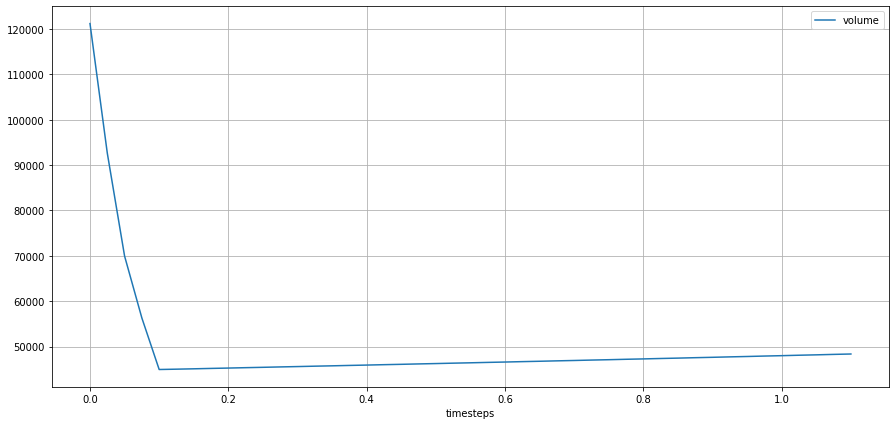

In [8]:
lv.volume()
lv.plot_metric(lv.STATES.VOLUME, kind="line")

Longitudinal Distances:

Spks-data relationship not found for metric longitudinal_distances. Check 'set_data_spk_rel' or 'add_spk_data'.


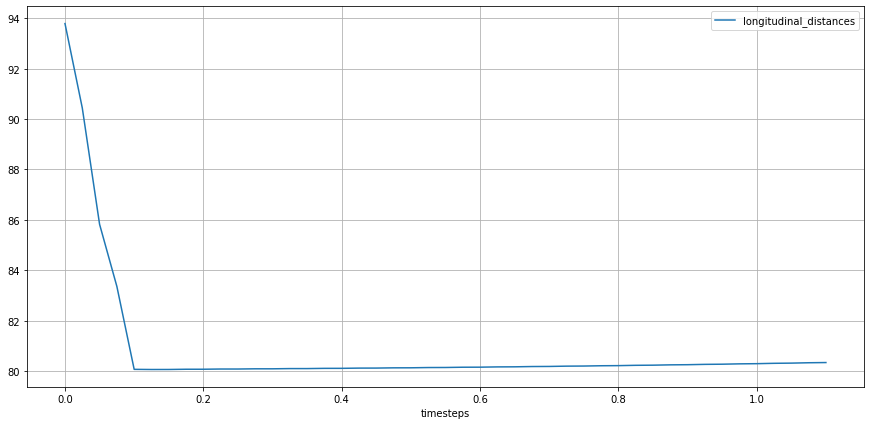

In [9]:
lv.longitudinal_distances()
lv.plot_metric(lv.STATES.LONG_DISTS, kind="line")

### Geo Metrics that do require speckles:

Radius (for each spk):

In [10]:
# from enum import Enum, IntEnum, EnumMeta

# def check_enum(name):
#     if isinstance(name, (Enum, IntEnum)):
#         name = name.value
#     return name

# def check_enum_name(name):
#     if isinstance(name, (Enum, IntEnum)):
#         name = name.name
#     return name

# def add_to_enum(enum_holder, *args):
#     if not issubclass(enum_holder.__class__, EnumMeta):
#         raise TypeError("Expected EnumMeta as first argument, got {}".format(enum_holder.__class__))
#     enumdict = {m.name: m.value for m in enum_holder}
#     n = "_".join([str(check_enum_name(v)).upper() for v in args ])
#     v = "_".join([str(check_enum(v)) for v in args ])
#     print(n, v)
#     enumdict[n] = v
#     return Enum(enum_holder.__name__,enumdict), (n, v)

In [11]:
# import logging

# logging.basicConfig()
# logger = logging.getLogger('LV')
# logger = logging.getLogger('LV.BaseMetricsComputations')


# def _reduce_metric_and_save(res, key, **kwargs):
#     res = lv._reduce_metric(res, **kwargs)
#     return lv._save_metric(res, key)

# def _reduce_metric_by_group(spks, data_key, **kwargs):
#     for key, values in spks.by("group").items():
#         lv.STATES, (_, key) = add_to_enum(lv.STATES, data_key, values[0].group)
#         res = [lv.states.get_spk_data(spk, data_key) for spk in values]
#         _reduce_metric_and_save(res, key, **kwargs)
#         lv.states.set_data_spk_rel(spks, key)

# def _reduce_metric_by_name(spks, data_key, **kwargs):
#     for key, values in spks.by("name").items():
#         lv.STATES, (_, key) = add_to_enum(lv.STATES, data_key, values[0].name)
#         res = [lv.states.get_spk_data(spk, data_key) for spk in values]
#         _reduce_metric_and_save(res, key, **kwargs)
#         lv.states.set_data_spk_rel(spks, key)

# def _reduce_metric_by_group_and_name(spks, data_key, **kwargs):
#     for key, values in spks.by("group_name").items():
#         lv.STATES, (_, key) = add_to_enum(lv.STATES, data_key, values[0].group, values[0].name)
#         res = [lv.states.get_spk_data(spk, data_key) for spk in values]
#         _reduce_metric_and_save(res, key, **kwargs)
#         lv.states.set_data_spk_rel(spks, key)


# def compute_radius(spks, reduce_by={"group"}, **kwargs):

#     # set key for this function
#     key = lv.STATES.RADIUS
#     logger.info("Computing: {}".format(key))
#     # resolve spks (make sure you have a SpeckeDeque)
#     spks = lv._resolve_spk_args(spks)
#     # compute metric
#     res = [lv.compute_spk_radius_for_each_timestep(spk, **kwargs) for spk in spks]
#     # reduce metric (here we compute the mean radius across entire LV)
#     _reduce_metric_and_save(res, key, **kwargs)
#     # set metric relationship with spks 
#     # so that we can reference which spks were used to compute this metric
#     lv.states.set_data_spk_rel(spks, key, **kwargs)
#     # Break down computation by each 'set of spks'
#     if "group" in reduce_by:
#         logger.debug("Reducing metric by group for: {}".format(key))
#         _reduce_metric_by_group(spks, key, **kwargs)
#         logger.info("Metric '{}' has reduced values by group.".format(key))
#     if "name" in reduce_by:
#         logger.debug("Reducing metric by name for: {}".format(key))
#         _reduce_metric_by_name(spks, key, **kwargs)
#         logger.info("Metric '{}' has reduced values by names.".format(key))
#     if "group_name" in reduce_by:
#         logger.debug("Reducing metric by group and name for: {}".format(key))
#         _reduce_metric_by_group_and_name(spks, key, **kwargs)
#         logger.info("Metric '{}' has reduced values by group and name.".format(key))

Expected values for radius at base: 

* EPI: 35
* ENDO: 25
* AVG: 30

suffix 'base' not found for metric 'radius': radius_base
suffix 'epi_base' not found for metric 'radius': radius_epi_base
suffix 'endo_base' not found for metric 'radius': radius_endo_base


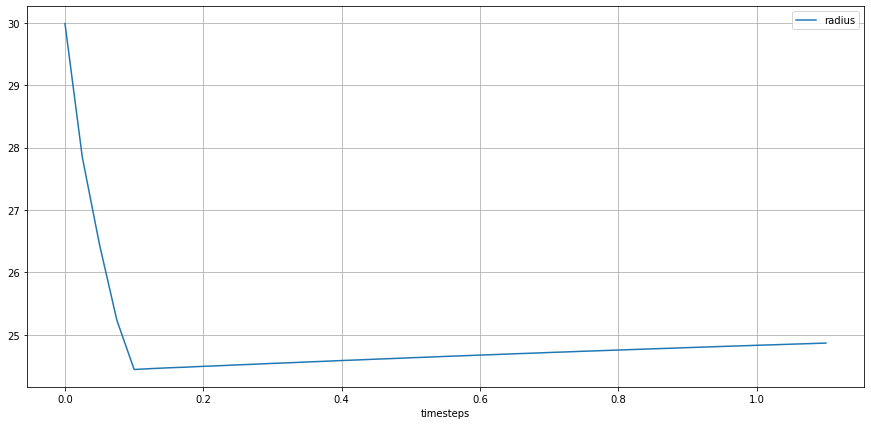

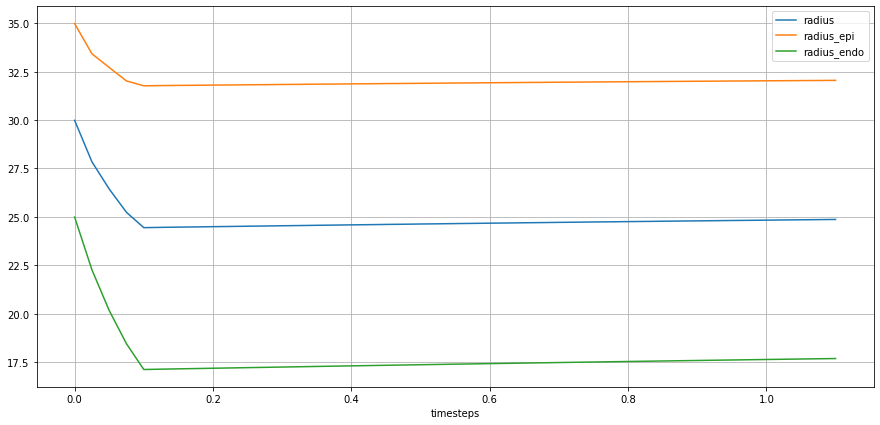

In [12]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
lv.radius(circ_spks)
lv.plot_metric(lv.STATES.RADIUS, 
    from_ts=0.0,
    plot_infos=["group"])

Thickness

Expected: 10

suffix 'base' not found for metric 'thickness': thickness_base
suffix 'epi' not found for metric 'thickness': thickness_epi
suffix 'epi_base' not found for metric 'thickness': thickness_epi_base


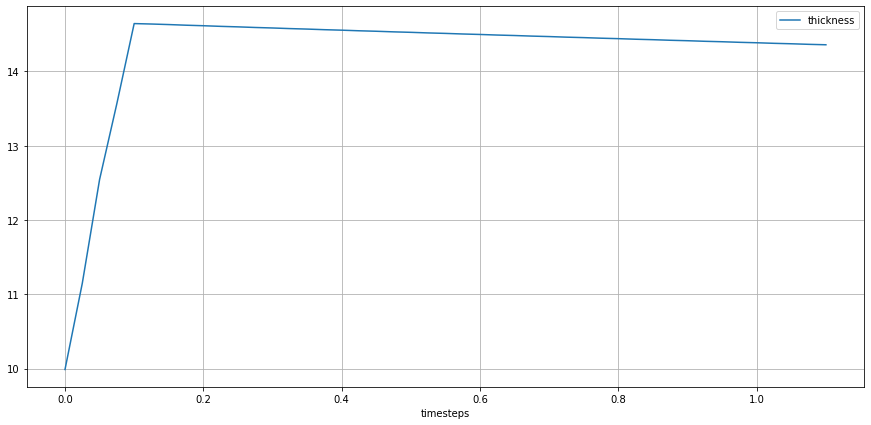

In [13]:
endo_circ_spks = lv.get_speckles(spk_name="base", spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_name="base", spk_group="epi", spk_collection="circ-6")

lv.thickness(endo_circ_spks, epi_circ_spks)
lv.plot_metric(lv.STATES.THICKNESS, from_ts=0.0)

In [14]:
from collections import deque

class TestList(deque):
    def __init__(self, *args, **kwargs):
        super(TestList, self).__init__(*args, **kwargs)
    def as_dict(self):
        return {str(i) for i in list(self)}

In [15]:
TestList([1,2,3]).as_dict()

{'1', '2', '3'}

Longitudinal Length:

In [16]:
lv.set_region_from_speckles("TEST-long-6", spk_group="endo", spk_collection="long-6")
lv.plot(
    scalars="TEST-long-6", 
    categorical=True, 
    cmap="jet",
    vnodes=[
            (LV_VIRTUAL_NODES.BASE, "red"),
            (LV_VIRTUAL_NODES.APEX, "red")
            ],
    )

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(position=(50000.000000…

In [17]:
from project_heart.utils.spatial_utils import compute_longitudinal_length

In [18]:
long_spks = lv.get_speckles(spk_collection="long-6")

all_spks_data_clustering = {}
for spk in long_spks:
    xyz = lv.states.get(lv.STATES.XYZ, mask=spk.ids)
    spk_res = [compute_longitudinal_length(coords) for coords in xyz]
    all_spks_data_clustering[spk.key()] = spk_res

In [19]:
class SpeckeDeque(deque):
    def __init__(self, *args, **kwargs):
        super(SpeckeDeque, self).__init__(*args, **kwargs)

In [20]:
long_spks.by("group")

{'endo': SpeckeDeque([<Speckle: .subset: 0, .name: 0, .group: endo, .collection: long-6, .t: 0.0>,
              <Speckle: .subset: 1, .name: 0, .group: endo, .collection: long-6, .t: 0.0>,
              <Speckle: .subset: 2, .name: 0, .group: endo, .collection: long-6, .t: 0.0>,
              <Speckle: .subset: 3, .name: 0, .group: endo, .collection: long-6, .t: 0.0>,
              <Speckle: .subset: 4, .name: 0, .group: endo, .collection: long-6, .t: 0.0>,
              <Speckle: .subset: 5, .name: 0, .group: endo, .collection: long-6, .t: 0.0>,
              <Speckle: .subset: 0, .name: 1, .group: endo, .collection: long-6, .t: 0.0>,
              <Speckle: .subset: 1, .name: 1, .group: endo, .collection: long-6, .t: 0.0>,
              <Speckle: .subset: 2, .name: 1, .group: endo, .collection: long-6, .t: 0.0>,
              <Speckle: .subset: 3, .name: 1, .group: endo, .collection: long-6, .t: 0.0>,
              <Speckle: .subset: 4, .name: 1, .group: endo, .collection: long-6, .

In [21]:
long_spks = lv.get_speckles(spk_collection="long-6")


[lv.compute_spk_longitudinal_length(spk, mfilter_ws=0, sfilter_ws=0, sfilter_or=0) for coords in long_spks]


[array([22.43011093, 21.71389961, 20.61336708, 20.45173073, 20.05970764,
        20.0601902 , 20.06339836, 20.06952667, 20.07237625, 20.07819557,
        20.08088684, 20.08655167, 20.08919144, 20.09478569, 20.0974369 ,
        20.10300446, 20.10570335, 20.11128235, 20.114048  , 20.11964607,
        20.12249184, 20.12812424, 20.13105774, 20.1367321 , 20.13975716,
        20.1454792 , 20.14859962, 20.15437317, 20.15759087, 20.16341591,
        20.16673851, 20.17261887, 20.17604256, 20.18198395, 20.18550682,
        20.19151306, 20.19514084, 20.20121384, 20.20495415, 20.21109581,
        20.21494484, 20.22115707, 20.22511864, 20.23140144, 20.23546982]),
 array([22.43011093, 21.71389961, 20.61336708, 20.45173073, 20.05970764,
        20.0601902 , 20.06339836, 20.06952667, 20.07237625, 20.07819557,
        20.08088684, 20.08655167, 20.08919144, 20.09478569, 20.0974369 ,
        20.10300446, 20.10570335, 20.11128235, 20.114048  , 20.11964607,
        20.12249184, 20.12812424, 20.13105774, 20

In [22]:
list(map(compute_length, xyz))

NameError: name 'compute_length' is not defined

In [ ]:
long_spks = lv.get_speckles(spk_name="0", spk_collection="long-6")
lv.longitudinal_length(long_spks, recompute=True, n_clusters=8, 
                                            reassignment_ratio=1e-3,
                                           batch_size=4096,
                                           mfilter_ws=0,
                                           sfilter_ws=0,
                                           sfilter_or=0,)
lv.plot_metric(lv.STATES.LONG_LENGTH, 
    from_ts=0.0,
    plot_infos=["group", "name"])

Circumferential Length:

In [ ]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
lv.circumferential_length(circ_spks)
lv.plot_metric(lv.STATES.CIRC_LENGTH, 
    from_ts=0.0,
    plot_infos=["group"])

Rotation:

In [ ]:
circ_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")
lv.rotation(circ_spks)
lv.plot_metric(lv.STATES.ROTATION, 
    from_ts=0.0,
    plot_infos=["group"])

## Clinical Metrics:

### Clinical metrics that do not require speckles

Ejection Fraction

In [ ]:
lv.ejection_fraction()
lv.plot_metric(lv.STATES.EF, 
    from_ts=0.1,
    plot_infos=["group"])

Longitudinal Shortening:

In [ ]:
lv.longitudinal_shortening()
lv.plot_metric(lv.STATES.LS, 
    from_ts=0.1,
    plot_infos=["group"])

### Clinical metrics that require speckles

Radial shortening


In [ ]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.radial_shortening(circ_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.RS, 
    from_ts=0.1,
    plot_infos=["group"])

Wall thickening:

In [ ]:
endo_circ_spks = lv.get_speckles(spk_group="endo", spk_collection="circ-6")
epi_circ_spks = lv.get_speckles(spk_group="epi", spk_collection="circ-6")

lv.wall_thickening(endo_circ_spks, epi_circ_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.WT, 
    from_ts=0.1,
    plot_infos=["group"])

Longitudinal strain:

In [ ]:
long_spks = lv.get_speckles(spk_collection="long-6")
lv.longitudinal_strain(long_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.SL, 
    from_ts=0.1,
    plot_infos=["group"])

Circumferential Strain:

In [ ]:
circ_spks = lv.get_speckles(spk_collection="circ-6")
lv.circumferential_strain(circ_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.SC, 
    from_ts=0.1,
    plot_infos=["group"])

Twist:

In [ ]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.twist(apex_spks, base_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.TW, 
    from_ts=0.1,
    plot_infos=["group"])

Torsion:

In [ ]:
apex_spks = lv.get_speckles(spk_name="apex", spk_collection="circ-6")
base_spks = lv.get_speckles(spk_name="base", spk_collection="circ-6")

lv.torsion(apex_spks, base_spks, t_ed=0.1)
lv.plot_metric(lv.STATES.TO, 
    from_ts=0.1,
    plot_infos=["group"])